In [76]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [77]:
def erreur(y_true, y_pred):
    return np.sqrt((y_true - y_pred)**2)

# # la fonction
# def f(x,y):
#     return np.sin(x + y)

def f(x,y):
    return np.sin(x*2*np.pi*y) + np.cos(np.pi*4*y)

In [78]:
# définition des points
N = 200
N_train = 10
N_batch_train = 4


import numpy as np

def generate_data(N_batch, N_train):
    """
    Génère un batch de grilles aléatoires pour x et y sur [0,1],
    retourne un tensor numpy de shape (N_batch, 2, N_train, N_train)
    """
    batch = np.zeros((N_batch, 2, N_train, N_train))
    
    for i in range(N_batch):
        # Générer des vecteurs x et y aléatoires sur [0,1]
        x = np.random.rand(N_train)
        y = np.random.rand(N_train)
        x = np.sort(x)
        y = np.sort(y)
        # Créer une grille
        X, Y = np.meshgrid(x, y)
        
        # Stocker dans le batch 
        batch[i, 0, :, :] = X
        batch[i, 1, :, :] = Y
    
    return batch

XY_batch = generate_data(N_batch_train, N_train)

# Calculer Z_batch avant transpose pour plus de clarté
Z_batch = f(XY_batch[:,0,:,:], XY_batch[:,1,:,:])  # shape = (100,60,60)
print(Z_batch.shape)
# Maintenant on peut transposer XY_batch pour Conv2D
XY_batch = XY_batch.transpose(0,2,3,1)  # shape = (100,60,60,2)




# N points de test
x_test = np.linspace(0, 1, N)
y_test = np.linspace(0, 1, N)
XY_test = np.meshgrid(x_test, y_test)
XY_test = np.array(XY_test)
Z_test = f(XY_test[0],XY_test[1])


(4, 10, 10)


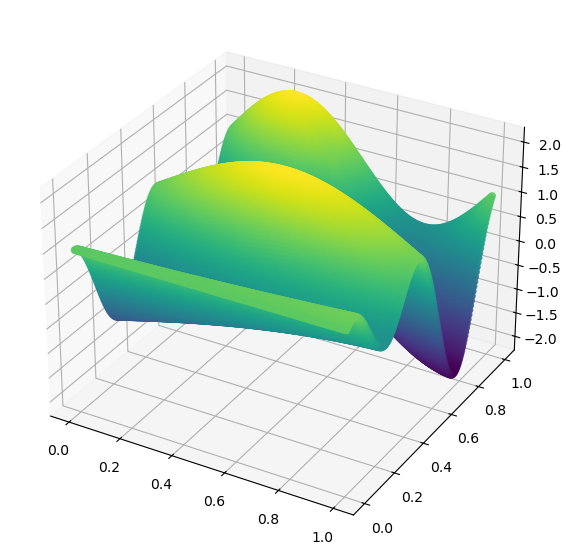

In [79]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(XY_test[0], XY_test[1], f(XY_test[0],XY_test[1]),c = f(XY_test[0],XY_test[1]) ,cmap='viridis', alpha=0.8)
plt.show()

In [80]:
# création du modèle

Inputs = Input(shape=(None,None,2))
x = Conv2D(128, kernel_size=4,padding='same', activation='tanh')(Inputs)
x = Conv2D(32, kernel_size=4,padding='same', activation='tanh')(x)
x_output = Conv2D(1, kernel_size=1,padding='same', activation='tanh')(x)

model = Model(inputs=Inputs, outputs=x_output)


In [81]:
Z_batch = Z_batch[..., np.newaxis]  # ajoute le canal
print(Z_batch.shape)  # (1, 10, 10, 1)


(4, 10, 10, 1)


In [82]:
model.compile(optimizer='adam', loss='mse')
model.fit(XY_batch, Z_batch, epochs=150, batch_size=64)

Epoch 1/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - loss: 0.9912
Epoch 2/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.8428
Epoch 3/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.8819
Epoch 4/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.8483
Epoch 5/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.7699
Epoch 6/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.6839
Epoch 7/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.6730
Epoch 8/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.7294
Epoch 9/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.6752
Epoch 10/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6140
Epoch 11/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6065
Epoch 12/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6175
Epoch 13/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.6153
Epoch 14/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.5930
Epoch 15/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.5641
Epoch 16/150
1/1 ━

In [83]:
XY_test_transpose = XY_test.transpose(1, 2, 0)
XY_test_batch = np.expand_dims(XY_test_transpose, axis=0)  # shape (1, 20, 20, 2)
print(XY_test.shape)

(2, 200, 200)


In [84]:
y_pred = model.predict(XY_test_batch)
y_pred = y_pred[0, ..., 0]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


In [85]:
# calcule de l'erreur entre les 2 fonctions ( prédit - vrai )
res = erreur(y_pred,Z_test)
print(np.sum(res))

33452.40191447551


In [86]:
print(y_pred.shape)
print(XY_test_transpose.shape)
print(XY_test[0].shape)
print(XY_test[1].shape)

(200, 200)
(200, 200, 2)
(200, 200)
(200, 200)


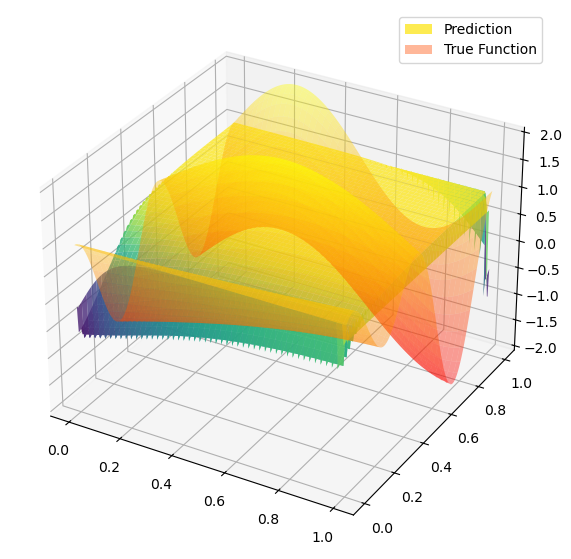

In [97]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

#Affichage en points
ax.plot_surface(XY_test[0], XY_test[1], y_pred,
                cmap='viridis', alpha=0.8,
                label='Prediction')

ax.plot_surface(XY_test[0], XY_test[1], Z_test,
                cmap='autumn', alpha=0.4,
                label='True Function')
ax.legend()
plt.show()


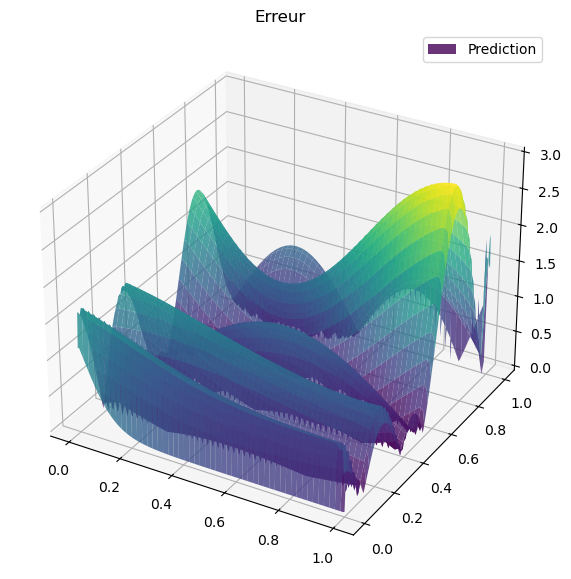

In [98]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Affichage en points
ax.plot_surface(XY_test[0], XY_test[1], res, cmap='viridis',alpha=0.8, label='Prediction')
ax.set_title("Erreur")
ax.legend()
plt.show()

In [89]:
# mse
print(np.sum(res**2)/N**2)

1.0684575748216367
